# Assignment 03: Rasters and Tables

For this assignment, you will be using Numpy, GDAL, and Pandas. Most of these questions  can be solved using methods shown in lecture. However, some cases will require you to search the internet for answers. This is intended because efficiently searching documentation or Stackoverflow is a requirement of modern programing. This assignment also requires you to obtain data (I will tell you where) and organize it correctly so that you can access is via relative paths (do not use absolute paths anywhere in this assignment).

To turn this in, create a PDF of your finished Jupyter notebook using Quarto (we will discuss this on Tuesday) and upload it to Canvas.


## Question 1

For this question, you will be using numpy to manipulate arrays in a way that works well for big data and will be using spatial tools to assess land-use change. Specifically, you will use data from a global, 300m resolution land-use, land-cover (LULC) map produced by ESACCI. They provide a wonderful time series of data from 1992-2019. If you want more information, check out their web viewer at https://maps.elie.ucl.ac.be/CCI/viewer/. Here you can view the data but also learn more about the classification regressions that uses time-series spectral data patterns to classify grid-cells into different types. I have extracted lulc maps for the country of Rwanda, which you will find in this assignment's data folder.

### Part a. 

Using the gdal package and the gdal.Open() function, open up the land-use, land-cover map for Rwanda in 2000. 

In this file, there is only 1 band in this file, so you can also access it with the GetRasterBand(1) function. Without reading the whole array, show how you can determine how many total grid-cells there are in this country.

In [ ]:
# 1A Answer
from osgeo import gdal
import numpy as np
import os
import matplotlib.pyplot as plt

geotiff_filename = 'rwanda_lulc_2000.tif'
data_directory = '../../base_data'
geotiff_file_path = os.path.join(data_directory, geotiff_filename)

rwanda_lulc = gdal.Open(geotiff_file_path)

n_rows = rwanda_lulc.RasterYSize
n_cols = rwanda_lulc.RasterXSize
total_grid_cells = n_rows*n_cols

print('Total number of cells in this LULC map is: ', total_grid_cells)


Total number of cells in this LULC map is:  466284


### Part b.

Using the results of part a, read the whole array into memory as a numpy array (the default option when using the ReadAsArray() funciton), and plot it using the matplotlib imshow command. Add a nice title to the plot describing what it is.

In [ ]:
# First we find what LULC classes there are
classes = np.unique(array)
print(classes)

[ 10  11  12  20  30  40  50  60  61  62  70 100 110 120 122 130 150 160
 170 180 190 200 210 255]


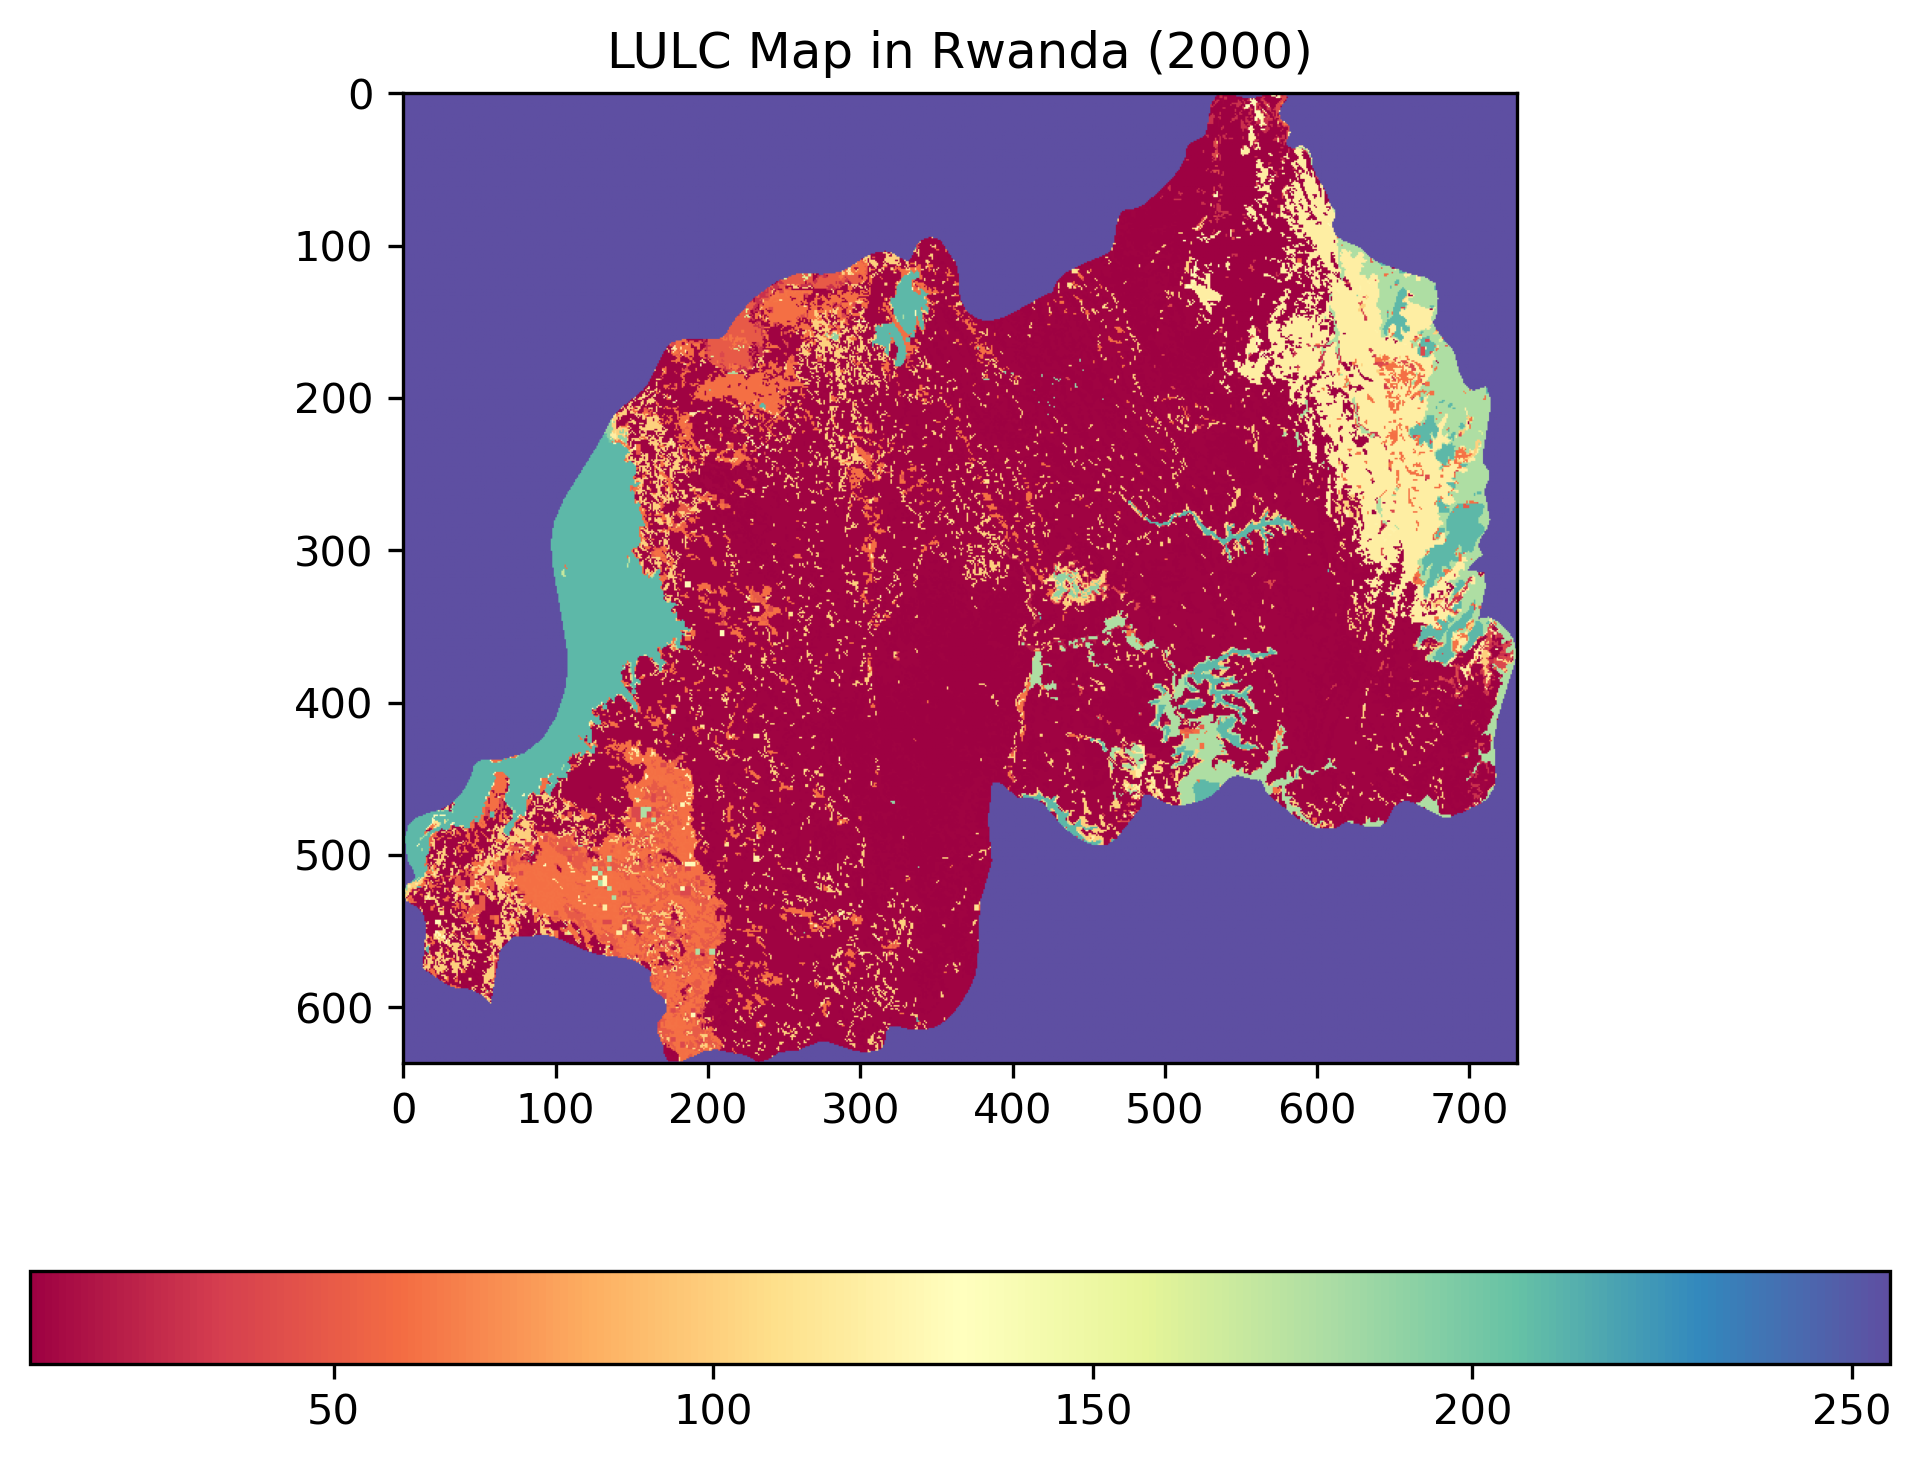

In [ ]:
#1B Answer
array_2000 = rwanda_lulc.ReadAsArray()

fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()


ax.set_title('LULC Map in Rwanda (2000)')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(array)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(10, 255)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal')

plt.show()

#plt.imshow(array)
#plt.title('Rwanda Land Use Land Cover Map (2000)')
#plt.show()

### Part c.

Using the legend you find at https://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-QuickUserGuide-LC-Maps_v2-0-7.pdf reclassify the LULC into a simplified map where 1 = cropland (including any mosaic types that are partially cropland) and 0 = anything else. Plot this using imshow.

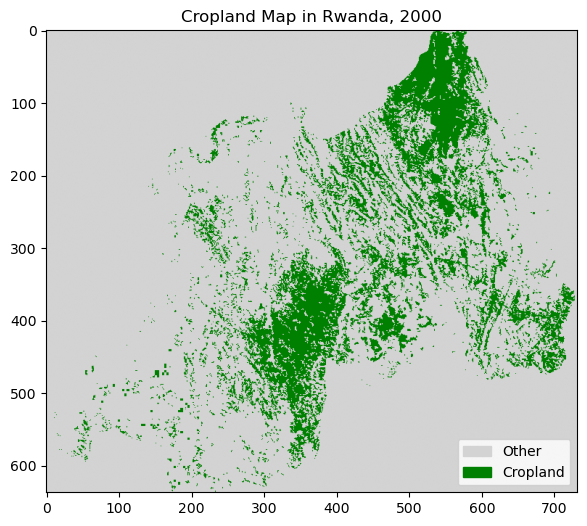

In [ ]:
# 1C Answer
from matplotlib.colors import ListedColormap
binary = np.isin(array, [10, 20, 30, 40]).astype(np.uint8)

# Define colors: 0 = light gray, 1 = red (or whatever you want)
cmap = ListedColormap(['lightgray', 'green'])

plt.figure(figsize=(8, 6))
im = plt.imshow(binary, cmap=cmap)

# Create a custom legend
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color='lightgray', label='Other'),
    mpatches.Patch(color='green', label='Cropland')
]

plt.legend(handles=legend_patches, loc='lower right')
plt.title("Cropland Map in Rwanda, 2000")
#plt.axis('off')

plt.show()

#plt.imshow(binary)
#plt.title('Rwanda Land Use Land Cover Map (2000)')
#plt.show()

### Part d.

Repeat the process for the 2010 LULC map. Using this array with the one from part c, create a new array that records where there was cropland expansion (i.e., there is cropland in 2010 but not in 2000) and where there was cropland abandonment (cropland in 2000 but not in 2010). Save this classification in a single new array. Plot this last array. Optionally, add a legend indicating which values in the array denote expansion and abandonment using some variant of `ax.legend()'. 

In [ ]:
# 2D Answer

### Part e.

Repeat the all the steps in part d, but with the 2015 LULC map, calculating the difference between 2015 and 2010.

In [ ]:
# 2E Answer

### Part f.

Use the two cropland binary rasters you processed above and make a new raster as follows:

0 = Never cropland
1 = Cropland in 2000 only
2 = Cropland in 2010 only
3 = Cropland in 2015 only
4 = Cropland in 2000 and 2010
5 = Cropland in 2000 and 2015
6 = Cropland in 2010 and 2015
7 = Cropland in 2000, 2010, and 2015

Plot this raster using imshow. Add a legend indicating what each value means.

A tip for you: when you are combining multiple logical statements in numpy, each individual logical statement must be surrounded by parentheses. Additionally, you have to use the bitwise logical operators & and | instead of the normal logical operators and and or (numpy requires this for specificity).

For example, np.where((a == 1) & (b == 2)) will return the indices where a is 1 and b is 2. If you do np.where(a == 1 & b == 2) or np.where((a == 1) and (b == 2)), you will get an error.

In [ ]:
#2F Answer

### Part g.

Describe your results. What do you notice about the spatial patterns of cropland expansion and abandonment? What do you think might be driving these patterns? Were they clustered in any specific area? Were the changes the same between 2000-2010 and 2010-2015?

## Question 2

For this question, you will analyze crops using two datasets:

1. FAOSTAT Production_Crops_E_All_Data_(Normalized).csv. You could download it yourself but please use the one in the Class's Data Directory.
2. MAPSPAM (Spatial Production Allocation Mode). You can find the download listing here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/PRFF8V Download the readme and all of the files that end with .geotiff.zip. Unzip them and put them in a folder called spam in your Class's Data Directory. This is a big download, so it may take a while. Go watch a show or something. I don't know, what do people do nowadays for fun?3. 

Sidenote: MAPSPAM was a competitor to the EARTHSTAT data we showed in class before. However, MAPSPAM continues to be updated and is more open-source, so I am in the process of switching my whole GTAP-InVEST model to it. 

You will choose 5 crops that interest you, making sure to select crops that are in both MAPSPAM and FAOSTAT dataset. You will want to refer to the ReadMe_v2r0_Global.txt file, which was available at the same download site for MAPSPAM, to identify what each of the different crops mean. For each crop you choose (use a loop), calculate the global sum of production tonnage for irrigated crops, all rainfed crops combined but excluding subsistence crops, and for all crops together. Report those values via print(). 

Next, for the same crops, compare how the value you calculated above compares to the value in the FAOSTAT dataset. To do this, you will need to use Pandas to load the CSV and then figure out how to get just the production tonnage values for the crops you are interested in. Interpret your results for your crops. Is FAO higher/lower than MAPSPAM? Do you notice any patterns to the difference?

In [ ]:
# Question 2 answer